In [449]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [450]:
# Carregue aqui o dataset
loans = pd.read_csv("..\data\loans.csv")
demogra = pd.read_csv("..\data\Demographics.csv")
accounts = pd.read_csv("..\data\Accounts.csv")
result = pd.read_csv("..\data\ANSWERS.csv")

Podemos usar os métodos `.info()` e `.describe()` para obter informações básicas sobre quantidade presente dos dados, tipos e valores deles.

In [451]:
loans.describe()

,ID,PAYMENT_TERM,INSTALLMENT_PERCENT,LOAN_AMOUNT,ALLOW
count,3.999000e+03,3975.000000,3974.000000,3981.000000,3999.000000
mean,6.603562e+05,653.796981,2.981379,3479.168802,0.664166
std,3.728332e+05,338.723239,1.121448,2489.961917,0.472340
min,9.800000e+01,120.000000,1.000000,250.000000,0.000000
25%,3.418460e+05,390.000000,2.000000,1330.000000,0.000000
50%,6.670610e+05,651.000000,3.000000,3237.000000,1.000000
75%,9.778745e+05,899.000000,4.000000,5334.000000,1.000000
max,1.320082e+06,1984.000000,6.000000,11676.000000,1.000000


In [452]:
lo_de = loans.merge(demogra)
# lo_de = lo_de.dropna()

In [453]:
# lo_de_ac = lo_de.merge(accounts, on='ID', how='left')
lo_de_ac = lo_de.merge(accounts, on='ID')

In [454]:
lo_de_ac.count()

ID                            2477
PAYMENT_TERM                  2460
INSTALLMENT_PLANS             2462
INSTALLMENT_PERCENT           2459
LOAN_PURPOSE                  2467
LOAN_AMOUNT                   2466
OTHERS_ON_LOAN                2464
ALLOW                         2477
SEX                           2467
AGE                           2465
JOB_TYPE                      2464
DEPENDENTS                    2461
TELEPHONE                     2464
FOREIGN_WORKER                2463
EMPLOYMENT_DURATION           2472
PROPERTY                      2465
HOUSING                       2465
CURRENT_RESIDENCE_DURATION    2469
CHECKING_BALANCE              2467
CREDIT_HISTORY                2462
EXISTING_SAVINGS              2467
EXISTING_CREDITS_COUNT        2463
dtype: int64

## Tratamento dos dados

In [468]:
clean_df = result.copy()

In [455]:
clean_df = lo_de_ac.copy()

In [456]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1000 non-null   int64 
 1   CHECKING_BALANCE            1000 non-null   object
 2   PAYMENT_TERM                1000 non-null   int64 
 3   CREDIT_HISTORY              1000 non-null   object
 4   LOAN_PURPOSE                1000 non-null   object
 5   LOAN_AMOUNT                 1000 non-null   int64 
 6   EXISTING_SAVINGS            1000 non-null   object
 7   EMPLOYMENT_DURATION         1000 non-null   int64 
 8   INSTALLMENT_PERCENT         1000 non-null   int64 
 9   SEX                         1000 non-null   object
 10  OTHERS_ON_LOAN              1000 non-null   object
 11  CURRENT_RESIDENCE_DURATION  1000 non-null   int64 
 12  PROPERTY                    1000 non-null   object
 13  AGE                         1000 non-null   int64

In [469]:
clean_df['PAYMENT_TERM'] = clean_df.PAYMENT_TERM.fillna(clean_df.PAYMENT_TERM.mean())
clean_df['INSTALLMENT_PLANS'] = clean_df.INSTALLMENT_PLANS.fillna("NONE")
clean_df['INSTALLMENT_PERCENT'] = clean_df.INSTALLMENT_PERCENT.fillna(clean_df.INSTALLMENT_PERCENT.median())
clean_df['LOAN_PURPOSE'] = clean_df.LOAN_PURPOSE.fillna("NONE")
clean_df['LOAN_AMOUNT'] = clean_df.LOAN_AMOUNT.fillna(clean_df.LOAN_AMOUNT.median())
clean_df['OTHERS_ON_LOAN'] = clean_df.OTHERS_ON_LOAN.fillna("NONE")
clean_df.dropna(subset=['SEX'], inplace=True)
clean_df['AGE'] = clean_df.AGE.fillna(clean_df.AGE.mean())
clean_df['JOB_TYPE'] = clean_df.JOB_TYPE.fillna(clean_df.JOB_TYPE.median())
clean_df['DEPENDENTS'] = clean_df.DEPENDENTS.fillna("0").astype('int64')
clean_df['TELEPHONE'] = clean_df.TELEPHONE.fillna("0").astype('int64')
clean_df['FOREIGN_WORKER'] = clean_df.FOREIGN_WORKER.fillna("0").astype('int64')
clean_df['EMPLOYMENT_DURATION'] = clean_df.EMPLOYMENT_DURATION.fillna("0").astype('int64')
clean_df['PROPERTY'] = clean_df.PROPERTY.fillna("UNKNOWN")
clean_df['HOUSING'] = clean_df.HOUSING.fillna("UNKNOWN")
clean_df['CURRENT_RESIDENCE_DURATION'] = clean_df.CURRENT_RESIDENCE_DURATION.fillna(clean_df.CURRENT_RESIDENCE_DURATION.mean())

In [ ]:
# object_columns = ['PAYMENT_TERM','INSTALLMENT_PLANS', 'INSTALLMENT_PERCENT',
#        'LOAN_PURPOSE', 'LOAN_AMOUNT', 'OTHERS_ON_LOAN', 'AGE',
#        'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
#        'EMPLOYMENT_DURATION', 'PROPERTY', 'HOUSING',
#        'CURRENT_RESIDENCE_DURATION', 'CHECKING_BALANCE','CHECKING_BALANCE_n','CREDIT_HISTORY','EXISTING_SAVINGS',
#        'EXISTING_CREDITS_COUNT']
# clean_df = clean_df.drop(object_columns, axis=1)
# clean_df = clean_df.drop('ID', axis=1)

In [470]:
# clean_df.INSTALLMENT_PLANS = clean_df.INSTALLMENT_PLANS.map({'NONE':0,'STORES':1,'BANK':2})
# clean_df.OTHERS_ON_LOAN = clean_df.OTHERS_ON_LOAN.map({'NONE':0,'CO-APPLICANT':1,'GUARANTOR':2})
# clean_df.SEX = clean_df.SEX.map({'M':0,'F':1})
# clean_df.PROPERTY = clean_df.PROPERTY.map({'SAVINGS_INSURANCE':0,'CAR_OTHER':1,'REAL_ESTATE':2,'UNKNOWN':3})
# clean_df.HOUSING = clean_df.HOUSING.map({'OWN':0,'RENT':1,'FREE':2})
# clean_df.LOAN_PURPOSE = clean_df.LOAN_PURPOSE.map({'CAR_USED':0,'CAR_NEW':1,'APPLIANCES':2,'FURNITURE':3,'VACATION':4,'RADIO_TV':5,'OTHER':6,'REPAIRS':7,'RETRAINING':8,'EDUCATION':9,'BUSINESS':10})
clean_df['PAYMENT_TERM'] = pd.cut(x=clean_df['PAYMENT_TERM'], bins=[0, 200, 400, 600, 800, 1000, 1200, 1400,1600,1800,2000], labels=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
clean_df['LOAN_AMOUNT'] = pd.cut(x=clean_df['LOAN_AMOUNT'], bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000], labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

<AxesSubplot:>

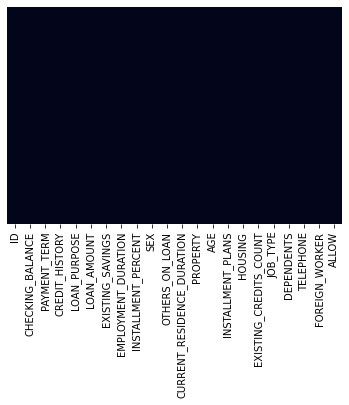

In [440]:
sns.heatmap(clean_df.isnull(),yticklabels=False,cbar=False)

In [471]:
clean_df.CHECKING_BALANCE = clean_df.CHECKING_BALANCE.fillna("NO_CHECKING")
clean_df.CHECKING_BALANCE = clean_df.CHECKING_BALANCE.apply(lambda x: '0' if x == 'NO_CHECKING' else x )
clean_df.CREDIT_HISTORY = clean_df.CREDIT_HISTORY.fillna("UNKNOWN")
# clean_df.CREDIT_HISTORY = clean_df.CREDIT_HISTORY.map({'UNKNOWN':0,'NO_CREDITS':1,'OUTSTANDING_CREDIT':2,'PRIOR_PAYMENTS_DELAYED':3,'CREDITS_PAID_TO_DATE':4,'ALL_CREDITS_PAID_BACK':5})
clean_df.EXISTING_SAVINGS = clean_df.EXISTING_SAVINGS.fillna("UNKNOWN")
clean_df.EXISTING_SAVINGS = clean_df.EXISTING_SAVINGS.apply(lambda x: '0' if x == 'UNKNOWN' else x )
clean_df.EXISTING_CREDITS_COUNT = clean_df.EXISTING_CREDITS_COUNT.fillna(-1)
clean_df.CHECKING_BALANCE = clean_df.CHECKING_BALANCE.astype(float).round(0).astype(int)
clean_df.EXISTING_SAVINGS = clean_df.EXISTING_SAVINGS.astype(float).round(0).astype(int)
clean_df['CHECKING_BALANCE'] = pd.cut(x=clean_df['CHECKING_BALANCE'], bins=[-2800,-2100,-1400,-700,0,700,1400,2100,2800,3500,4200,4900,5600,6300,7000,7700,8400,9100,9800,10500,11200,11900,12600,13300,14000,14700,15400,16100,16800,17500,18200,18900,19600,20300,21000,21700,22400,23100,23800,24500,25200,25900,26600,27300,28000,28700], labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44])
clean_df['EXISTING_SAVINGS'] = pd.cut(x=clean_df['EXISTING_SAVINGS'], bins=[-1,0,1500,3000,4500,6000,7500,9000,10500,12000,13500,15000,16500,18000,19500,21000,22500,24000,25500,27000,28500,30000,31500,33000,34500,36000,37500,39000,40500,42000,43500,45000,46500,48000,49500,51000], labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34])


In [442]:
clean_df.columns

Index(['ID', 'CHECKING_BALANCE', 'PAYMENT_TERM', 'CREDIT_HISTORY',
       'LOAN_PURPOSE', 'LOAN_AMOUNT', 'EXISTING_SAVINGS',
       'EMPLOYMENT_DURATION', 'INSTALLMENT_PERCENT', 'SEX', 'OTHERS_ON_LOAN',
       'CURRENT_RESIDENCE_DURATION', 'PROPERTY', 'AGE', 'INSTALLMENT_PLANS',
       'HOUSING', 'EXISTING_CREDITS_COUNT', 'JOB_TYPE', 'DEPENDENTS',
       'TELEPHONE', 'FOREIGN_WORKER', 'ALLOW'],
      dtype='object')

### Usando One-Hot Encoding

In [472]:
clean_df = pd.get_dummies(clean_df, columns=['INSTALLMENT_PLANS','OTHERS_ON_LOAN','SEX','PROPERTY','HOUSING',
                   'LOAN_PURPOSE','PAYMENT_TERM','LOAN_AMOUNT','CREDIT_HISTORY','CHECKING_BALANCE','EXISTING_SAVINGS'])

In [475]:
X = clean_df
X['CREDIT_HISTORY_UNKNOWN'] = 0
X['HOUSING_UNKNOWN'] = 0
X['LOAN_PURPOSE_NONE'] = 0
X.LOAN_PURPOSE_NONE.value_counts()

0    1000
Name: LOAN_PURPOSE_NONE, dtype: int64

In [467]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2467 entries, 0 to 2476
Columns: 147 entries, ID to EXISTING_SAVINGS_34
dtypes: float64(5), int64(6), uint8(136)
memory usage: 558.9 KB


In [476]:
clean_df.isnull().sum()

ID                            0
EMPLOYMENT_DURATION           0
INSTALLMENT_PERCENT           0
CURRENT_RESIDENCE_DURATION    0
AGE                           0
                             ..
EXISTING_SAVINGS_33           0
EXISTING_SAVINGS_34           0
CREDIT_HISTORY_UNKNOWN        0
HOUSING_UNKNOWN               0
LOAN_PURPOSE_NONE             0
Length: 147, dtype: int64

In [384]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Abaixo, separamos os dados que queremos predizer dos dados que utilizamos como informações para a predição.

In [ ]:
# object_columns = ['PAYMENT_TERM','INSTALLMENT_PLANS', 'INSTALLMENT_PERCENT',
#        'LOAN_PURPOSE', 'LOAN_AMOUNT', 'OTHERS_ON_LOAN', 'AGE',
#        'JOB_TYPE', 'DEPENDENTS', 'TELEPHONE', 'FOREIGN_WORKER',
#        'EMPLOYMENT_DURATION', 'PROPERTY', 'HOUSING',
#        'CURRENT_RESIDENCE_DURATION', 'CHECKING_BALANCE','CHECKING_BALANCE_n','CREDIT_HISTORY','EXISTING_SAVINGS',
#        'EXISTING_CREDITS_COUNT']
# clean_df = clean_df.drop(object_columns, axis=1)
# clean_df = clean_df.drop('ID', axis=1)

In [446]:
# Arquivo de resultado
X = clean_df.drop(['ALLOW'], axis=1)
X['CREDIT_HISTORY_UNKNOWN'] = 0
X['HOUSING_UNKNOWN'] = 0
X['LOAN_PURPOSE_NONE'] = 0

In [477]:
X = X.drop(['ALLOW'], axis=1)

In [480]:
y_result = []

In [481]:
y_result = model.predict(X)

C:\Users\a362014\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [489]:
(y_result == 0).sum()

3

In [431]:
X = clean_df.drop(['ALLOW'], axis=1).astype(float)
y = clean_df['ALLOW'].ravel().astype(float)
test_size = 0.30
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [432]:
from imblearn.over_sampling import SMOTE as Smote
smt = Smote(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

In [433]:
# Acurácia do modelo (com cross validate): 0.8370399337504602
model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, max_features='auto',
                            random_state=42, n_jobs=11, criterion='entropy', max_depth=22)

# Acurácia do modelo (com cross validate): 0.8322161391240339
# model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=2, max_features='auto',
#                              random_state=42, n_jobs=11, criterion='entropy', max_depth=18)

# Acurácia do modelo (com cross validate): 0.827889216047111
# model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=2, max_features="log2",
#                             random_state=42, n_jobs=11, criterion='entropy')

# model = LogisticRegression(solver='lbfgs', max_iter=4000)

# model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo (número de predições assertivas sobre número total de testes): 0.8070175438596491


In [434]:
from sklearn.model_selection import cross_val_score
acc_cv = cross_val_score(model,X_train, y_train,cv=10,n_jobs=-1, scoring='accuracy')
print(f"Acurácia do modelo (com cross validate): {acc_cv.mean()}")

# np.sqrt(mean_squared_error(y_test, y_pred))

Acurácia do modelo (com cross validate): 0.8315171187881599


Accuracy score = 0.8070175438596491
Mean absolute error = 0.19298245614035087


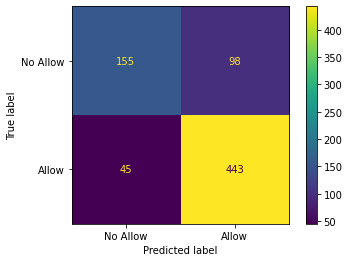

              precision    recall  f1-score   support

    No Allow       0.78      0.61      0.68       253
       Allow       0.82      0.91      0.86       488

    accuracy                           0.81       741
   macro avg       0.80      0.76      0.77       741
weighted avg       0.80      0.81      0.80       741



In [435]:
# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print(f'Accuracy score = {accuracy_score(y_test, predictions)}')
print(f'Mean absolute error = {mean_absolute_error(y_test, predictions)}')

# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
labels = ['No Allow', 'Allow']
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format='d')
plt.show()
print(classification_report(y_test, predictions, target_names=labels))



In [392]:
y_result = model.predict(result)

C:\Users\a362014\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ALLOW
- CHECKING_BALANCE
- CREDIT_HISTORY
- EXISTING_SAVINGS
- HOUSING
- ...
Feature names seen at fit time, yet now missing:
- CHECKING_BALANCE_0
- CHECKING_BALANCE_1
- CHECKING_BALANCE_10
- CHECKING_BALANCE_11
- CHECKING_BALANCE_12
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'NO_CHECKING'

In [391]:
X_test

,ID,INSTALLMENT_PERCENT,AGE,JOB_TYPE,DEPENDENTS,TELEPHONE,FOREIGN_WORKER,EMPLOYMENT_DURATION,CURRENT_RESIDENCE_DURATION,EXISTING_CREDITS_COUNT,...,EXISTING_SAVINGS_25,EXISTING_SAVINGS_26,EXISTING_SAVINGS_27,EXISTING_SAVINGS_28,EXISTING_SAVINGS_29,EXISTING_SAVINGS_30,EXISTING_SAVINGS_31,EXISTING_SAVINGS_32,EXISTING_SAVINGS_33,EXISTING_SAVINGS_34
2069,773126.0,5.0,39.0,1.0,2.0,1.0,1.0,9.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1923,598764.0,1.0,33.0,3.0,1.0,0.0,1.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,53475.0,4.0,56.0,0.0,2.0,1.0,1.0,11.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1890,325923.0,3.0,32.0,2.0,1.0,0.0,1.0,6.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,281575.0,4.0,54.0,3.0,1.0,1.0,1.0,9.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,278589.0,1.0,28.0,3.0,1.0,0.0,1.0,4.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1348,877498.0,2.0,24.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,602710.0,3.0,35.0,3.0,1.0,1.0,1.0,7.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,824212.0,3.0,26.0,3.0,2.0,1.0,1.0,1.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
